<a href="https://colab.research.google.com/github/ahsanrossi/coronavirus/blob/master/reading_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import time
#!pip install schedule
import schedule

# Pulling confirmed cases

In [0]:
confirmed_url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv"
death_url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Deaths.csv"
recovered_url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Recovered.csv"

In [0]:
def get_corona_data(data_url, case_type):
  df = pd.read_csv(data_url)
  melted_df = df.melt(id_vars = ["Province/State", "Country/Region", "Lat", "Long"])
  melted_df.rename(columns = {"variable":"Date", "value":case_type}, inplace=True)
  #melted_df.rename(columns = {"Province/State":"State", "value":case_type}, inplace=True)
  return melted_df

In [0]:
from functools import reduce
def merge_data(confirmed_df, death_df, recovered_df):
  dflist = [confirmed_df, death_df, recovered_df]
  return reduce(lambda left, right: pd.merge(left, right, on = ["Province/State", "Country/Region", "Lat", "Long", "Date"], how = "outer"), dflist).fillna(0)


In [0]:
#dflist = [confirmed_df, death_df, recovered_df]

def fetch_data():
  confirmed_df = get_corona_data(confirmed_url, "confirmed")
  death_df = get_corona_data(death_url, "death")
  recovered_df = get_corona_data(recovered_url, "recovered")
  final_df = merge_data(confirmed_df, death_df, recovered_df)
  print(final_df.head(1))
  return final_df


In [45]:
#from functools import reduce
#merged_df = reduce(lambda left, right: pd.merge(left, right, on = ["Province/State", "Country/Region", "Lat", "Long", "Date"], how = "outer"), dflist).fillna("missing")

#df_merged = reduce(lambda  left,right: pd.merge(left,right,on=['DATE'],
 #                                           how='outer'), data_frames)
merged_df = fetch_data()

  Province/State  Country/Region      Lat  ...  confirmed death  recovered
0          Anhui  Mainland China  31.8257  ...        1.0   0.0        0.0

[1 rows x 8 columns]


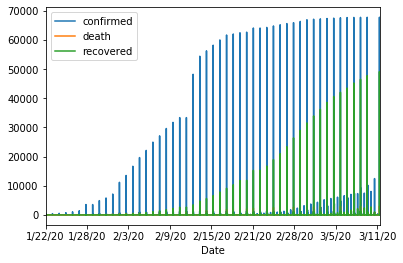

In [46]:
merged_df.plot('Date', ['confirmed','death', 'recovered'])

In [47]:
import plotly.express as px

import pandas as pd

fig = px.line(merged_df, x='Date', y='recovered')
fig.show()

In [50]:
schedule.every(10).seconds.do(fetch_data)

while True:
  schedule.run_pending()
  time.sleep(1)

  Province/State  Country/Region      Lat  ...  confirmed death  recovered
0          Anhui  Mainland China  31.8257  ...        1.0   0.0        0.0

[1 rows x 8 columns]
  Province/State  Country/Region      Lat  ...  confirmed death  recovered
0          Anhui  Mainland China  31.8257  ...        1.0   0.0        0.0

[1 rows x 8 columns]
  Province/State  Country/Region      Lat  ...  confirmed death  recovered
0          Anhui  Mainland China  31.8257  ...        1.0   0.0        0.0

[1 rows x 8 columns]
  Province/State  Country/Region      Lat  ...  confirmed death  recovered
0          Anhui  Mainland China  31.8257  ...        1.0   0.0        0.0

[1 rows x 8 columns]
  Province/State  Country/Region      Lat  ...  confirmed death  recovered
0          Anhui  Mainland China  31.8257  ...        1.0   0.0        0.0

[1 rows x 8 columns]
  Province/State  Country/Region      Lat  ...  confirmed death  recovered
0          Anhui  Mainland China  31.8257  ...        1.0   0.0  

KeyboardInterrupt: ignored

Cloning into 'coronavirus'...
remote: Enumerating objects: 12, done.
remote: Counting objects: 100% (12/12), done.
remote: Compressing objects: 100% (10/10), done.
remote: Total 12 (delta 2), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (12/12), done.


In [17]:
a

1

'/content'

'/content'